<a href="https://colab.research.google.com/github/asifabdullah-git/two_layer_nn/blob/main/Code/salary_prediction_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import metrics

In [ ]:
url = 'https://raw.githubusercontent.com/asifabdullah-git/two_layer_nn/main/Data/Salary_Data.csv'
df = pd.read_csv(url, encoding='utf-8')

In [ ]:
df.head()

,YearsExperience,Annual Salary(Naira)
0,0.0,487500.0
1,1.1,1310537.5
2,1.3,1396312.5
3,1.5,1290387.5
4,2.0,1362812.5


In [ ]:
print(df.shape)
print(df.dtypes)

(31, 2)
YearsExperience         float64
Annual Salary(Naira)    float64
dtype: object


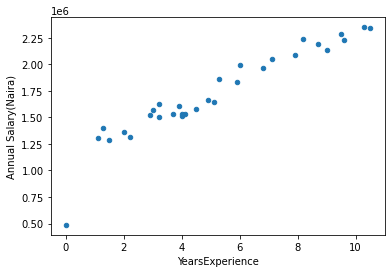

In [ ]:
data = pd.concat([df['Annual Salary(Naira)'], df['YearsExperience']], axis=1)
data.plot.scatter(x='YearsExperience', y='Annual Salary(Naira)');

In [ ]:
# Number of missing in each column
missing = pd.DataFrame(df.isnull().sum()).rename(columns = {0: 'total_missing'})
missing

,total_missing
YearsExperience,0
Annual Salary(Naira),0


In [ ]:
#Changing pandas dataframe to numpy array
x = df.iloc[:,:1].values
y = df.iloc[:,1:2].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(x)
x = norm.transform(x)

norm1 = MinMaxScaler().fit(y)
y = norm1.transform(y)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=42)


In [ ]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
tf.random.set_seed(1)

In [ ]:
#input layer
visible = Input(shape=(1,))

#Two hidden layers with 4 and 2 neurons
hidden1 = Dense(4, activation='relu')(visible)
hidden2 = Dense(2, activation='relu')(hidden1)

# Output layer
output = Dense(1,activation='linear')(hidden2)

In [ ]:
model = Model(inputs=visible, outputs=output)

In [ ]:
# summarize layers
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 8         
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 3         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#using SGD optimizer
opt = tf.keras.optimizers.SGD(learning_rate=0.005, momentum=0.9,clipnorm=0.5)

model.compile(loss='mean_squared_error', optimizer=opt, 
              metrics=[metrics.mean_squared_error, 
                       metrics.mean_absolute_error, 
                       metrics.mean_absolute_percentage_error])

In [ ]:
#callback function for reducing overfitting
callback = tf.keras.callbacks.EarlyStopping(monitor='mean_squared_error', patience=3)

In [ ]:
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=1000,callbacks=[callback])

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 0.2874 - mean_squared_error: 0.2874 - mean_absolute_error: 0.5267 - mean_absolute_percentage_error: 80.7573
Epoch 2/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.2819 - mean_squared_error: 0.2819 - mean_absolute_error: 0.5215 - mean_absolute_percentage_error: 79.9443
Epoch 3/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.2714 - mean_squared_error: 0.2714 - mean_absolute_error: 0.5115 - mean_absolute_percentage_error: 78.3903
Epoch 4/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2566 - mean_squared_error: 0.2566 - mean_absolute_error: 0.4972 - mean_absolute_percentage_error: 76.1533
Epoch 5/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.2382 - mean_squared_error: 0.2382 - mean_absolute_error: 0.4788 - mean_absolute_percentage_error: 73.2805
Epoch 6/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.2170 - mean_squared_error:

In [ ]:
y_pred = model.predict(x_test)

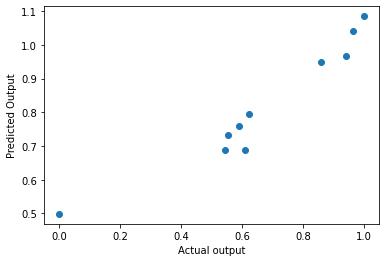

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual output')
plt.ylabel('Predicted Output')
plt.show()

In [ ]:
Xnew = [[2],[6]]
Xnew_transform = norm.transform(Xnew)
# make a prediction
ynew = model.predict(Xnew_transform)
ynew = norm1.inverse_transform(ynew)
# show the inputs and predicted outputs
print("Predicted salary",ynew[0],"for",Xnew[0],"years")
print("Predicted salary",ynew[1],"for",Xnew[1],"years")

Predicted salary [1639326.6] for [2] years
Predicted salary [2058148.2] for [6] years


In [ ]:
#testing model by user input

year = float(input("Year of experience: "))
year_new = [[year]]
year_transform = norm.transform(year_new)

salary = model.predict(year_transform)
salary = norm1.inverse_transform(salary)
print("Predicted salary is",str(salary).lstrip('[').rstrip(']'),"for",year,"years")


Year of experience: 4
Predicted salary is 1849772. for 4.0 years
